--- Ejemplo de Proyección ---
Vector a: [4 5]
Vector b: [6 2]

Proyección analítica de a sobre b: [5.1 1.7]
Proyección por gradiente descendente de a sobre b: [5.1 1.7]
Valor final de alpha (GD): 0.85


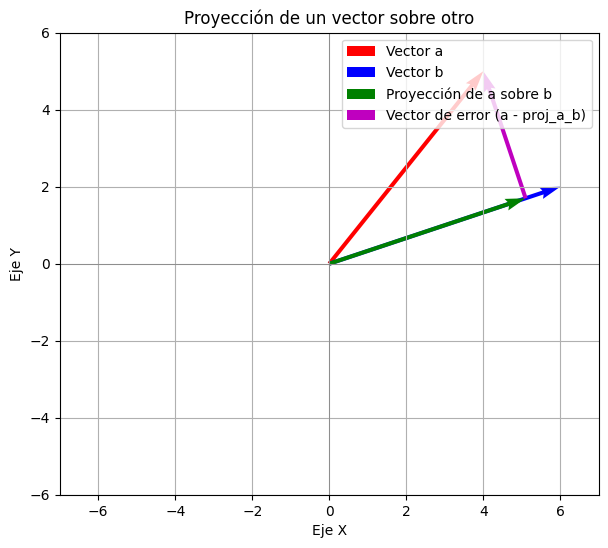

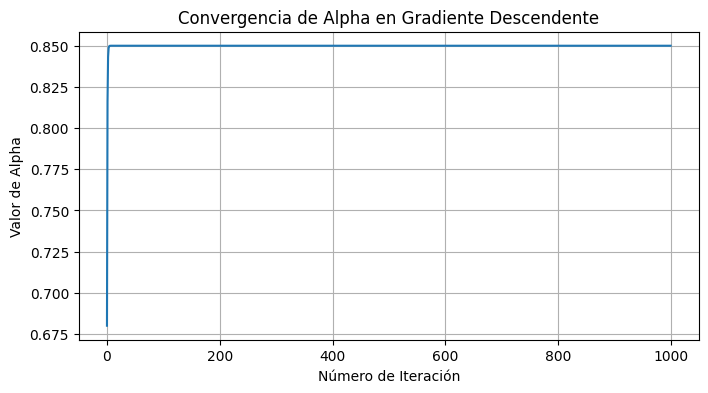

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Descripción General ---
# Este código implementa la proyección de un vector 'a' sobre un vector 'b' en 2 dimensiones
# utilizando dos enfoques: la solución analítica y el método iterativo de gradiente descendente.
# Se visualizan los vectores originales, la proyección y el error.

# --- Solución Analítica ---
# La proyección de 'a' sobre 'b' (proj_b a) se calcula mediante la fórmula:
# proj_b a = ((a . b) / ||b||^2) * b
# donde '.' es el producto punto y '||b||' es la norma (magnitud) del vector b.

def proyeccion_analitica(a, b):
    """
    Calcula la proyección del vector 'a' sobre el vector 'b' utilizando la solución analítica.

    Args:
        a (np.array): Vector a proyectar.
        b (np.array): Vector sobre el cual proyectar.

    Returns:
        np.array: Vector de proyección de a sobre b.
    """
    # Calcula el producto punto de a y b
    dot_product = np.dot(a, b)
    # Calcula el cuadrado de la norma de b
    norm_b_squared = np.dot(b, b)

    # Evitar división por cero si el vector b es el vector nulo
    if norm_b_squared == 0:
        return np.zeros_like(b)

    # Calcula el escalar de proyección (Alpha^asterisco)
    scalar_projection = dot_product / norm_b_squared
    # Calcula el vector de proyección
    projection = scalar_projection * b
    return projection

# --- Solución Iterativa (Gradiente Descendente) ---
# El objetivo es encontrar un escalar 'alpha' tal que 'alpha * b' sea la mejor aproximación de 'a'.
# Esto se puede formular como un problema de minimización del error cuadrático:
# E(alpha) = ||a - alpha * b||^2
# Se utiliza el método de gradiente descendente para encontrar el valor de 'alpha' que minimiza E(alpha).
# La derivada de E(alpha) con respecto a alpha es:
# dE/dalpha = -2 * (a - alpha * b) . b
# La regla de actualización para alpha es:
# alpha = alpha - learning_rate * dE/dalpha
# learning_rate = tasa de aprendizaje


def proyeccion_gradiente_descendente(a, b, learning_rate=0.01, num_iterations=1000):
    """
    Calcula la proyección del vector 'a' sobre el vector 'b' utilizando gradiente descendente.

    Args:
        a (np.array): Vector a proyectar.
        b (np.array): Vector sobre el cual proyectar.
        learning_rate (float): Controla qué tan grande es el paso que das en cada iteración del gradiente descendente.
        num_iterations (int): Número de iteraciones para el gradiente descendente.

    Returns:
        np.array: Vector de proyección de a sobre b (aproximado).
        list: Historial de valores de alpha durante las iteraciones.
    """
    # Inicializar alpha aleatoriamente o a 0
    alpha = 0.0
    alpha_history = []

    for i in range(num_iterations):
        # Calcular el error (vector)
        error_vector = a - alpha * b
        # Calcular el gradiente de la función de error con respecto a alpha
        gradient = -2 * np.dot(error_vector, b)
        # Actualizar alpha utilizando el gradiente descendente
        alpha = alpha - learning_rate * gradient
        alpha_history.append(alpha)

    # Calcular la proyección final con el alpha optimizado
    projection = alpha * b
    return projection, alpha_history

# --- Visualización ---
def plot_vectores(a, b, proj_a_b, error_vector):
    """
    Visualiza los vectores originales, la proyección y el vector de error.

    Args:
        a (np.array): Vector a proyectar.
        b (np.array): Vector sobre el cual proyectar.
        proj_a_b (np.array): Vector de proyección de a sobre b.
        error_vector (np.array): Vector de error (a - proj_a_b).
    """
    origin = np.array([0, 0]) # Origen de los vectores

    plt.figure(figsize=(8, 6))
    plt.quiver(*origin, *a, color='r', scale=1, angles='xy', scale_units='xy', label='Vector a')
    plt.quiver(*origin, *b, color='b', scale=1, angles='xy', scale_units='xy', label='Vector b')
    plt.quiver(*origin, *proj_a_b, color='g', scale=1, angles='xy', scale_units='xy', label='Proyección de a sobre b')
    plt.quiver(*proj_a_b, *error_vector, color='m', scale=1, angles='xy', scale_units='xy', label='Vector de error (a - proj_a_b)') # Vector de error desde la punta de la proyección

    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid()
    plt.legend()
    plt.xlim([-max(np.abs(a[0]), np.abs(b[0]), np.abs(proj_a_b[0]), np.abs(error_vector[0])) - 1, max(np.abs(a[0]), np.abs(b[0]), np.abs(proj_a_b[0]), np.abs(error_vector[0])) + 1])
    plt.ylim([-max(np.abs(a[1]), np.abs(b[1]), np.abs(proj_a_b[1]), np.abs(error_vector[1])) - 1, max(np.abs(a[1]), np.abs(b[1]), np.abs(proj_a_b[1]), np.abs(error_vector[1])) + 1])
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Proyección de un vector sobre otro')
    plt.gca().set_aspect('equal', adjustable='box') # Asegura que los ejes tengan la misma escala
    plt.show()

# --- Ejemplo de Uso ---
# Definir los vectores de ejemplo
vector_a = np.array([4, 5])
vector_b = np.array([6, 2])

print("--- Ejemplo de Proyección ---")
print(f"Vector a: {vector_a}")
print(f"Vector b: {vector_b}")

# Calcular la proyección utilizando la solución analítica
proyeccion_analitica_result = proyeccion_analitica(vector_a, vector_b) #Funcion definida antes (analitica)
print(f"\nProyección analítica de a sobre b: {proyeccion_analitica_result}")

# Calcular la proyección utilizando gradiente descendente
proyeccion_gd_result, alpha_history = proyeccion_gradiente_descendente(vector_a, vector_b) #Funcion definida antes (iterativa)
print(f"Proyección por gradiente descendente de a sobre b: {proyeccion_gd_result}")
print(f"Valor final de alpha (GD): {alpha_history[-1]}")

# Calcular el vector de error para la visualización
error_vector_analitico = vector_a - proyeccion_analitica_result

# Visualizar los vectores y la proyección (usando el resultado analítico para precisión)
plot_vectores(vector_a, vector_b, proyeccion_analitica_result, error_vector_analitico)

# Opcional: Graficar la convergencia de alpha en el gradiente descendente
plt.figure(figsize=(8, 4))
plt.plot(alpha_history)
plt.xlabel('Número de Iteración')
plt.ylabel('Valor de Alpha')
plt.title('Convergencia de Alpha en Gradiente Descendente')
plt.grid(True)
plt.show()

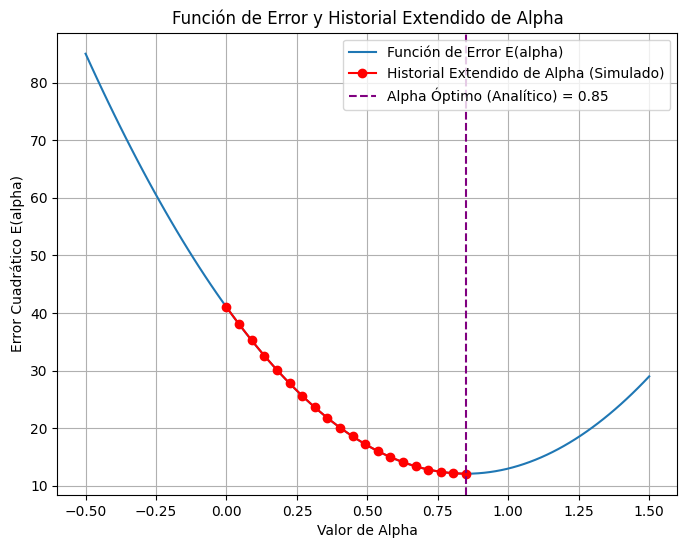

In [ ]:
# --- Visualización del Gradiente Descendente con Historial Extendido ---
# Graficar la función de error E(alpha) = ||a - alpha * b||^2 como una parábola.
# El mínimo de esta parábola corresponde al valor óptimo de alpha.

def error_function(a, b, alpha):
    """Calcula el error cuadrático para un dado alpha."""
    return np.sum((a - alpha * b)**2)

# Definir los vectores de ejemplo
# Si no están definidos, definir aquí:
vector_a = np.array([4, 5])
vector_b = np.array([6, 2])


# Definir un rango de valores para alpha para graficar la parábola
# Divide el intervalo que va desde -0,5 - 1.5 en 100 partes
alpha_range = np.linspace(-0.5, 1.5, 100) # Ajusta el rango según sea necesario para ver el historial

# Calcular los valores de la función de error para cada alpha en el rango
error_values = [error_function(vector_a, vector_b, alpha) for alpha in alpha_range]

# Graficar la parábola de la función de error
plt.figure(figsize=(8, 6))
plt.plot(alpha_range, error_values, label='Función de Error E(alpha)')
plt.xlabel('Valor de Alpha')
plt.ylabel('Error Cuadrático E(alpha)')
plt.title('Función de Error y Historial Extendido de Alpha')
plt.grid(True)

# Crear un historial de valores de alpha más largo para visualización
# Estos valores simulan pasos más pequeños del gradiente descendente
# El rango va desde 0 hasta 0.85 o que es lo mismo le valor de alpha^asterisco calculado
long_alpha_history = np.linspace(0.0, np.dot(vector_a, vector_b) / np.dot(vector_b, vector_b), 20) # 20 pasos desde 0 hasta el alpha óptimo

# Graficar el historial extendido de valores de alpha sobre la parábola
plt.plot(long_alpha_history, [error_function(vector_a, vector_b, alpha) for alpha in long_alpha_history], 'o-', color='red', label='Historial Extendido de Alpha (Simulado)')

# Marcar el valor final de alpha (óptimo analítico)
alpha_optimo = np.dot(vector_a, vector_b) / np.dot(vector_b, vector_b)
plt.axvline(alpha_optimo, color='purple', linestyle='--', label=f'Alpha Óptimo (Analítico) = {alpha_optimo:.2f}')


plt.legend()
plt.show()

In [ ]:
# ============================================================
# 1) Instalación de dependencias
# ============================================================
!pip install tensorflow pillow numpy pandas

# ============================================================
# 2) Importaciones
# ============================================================
import numpy as np
import pandas as pd
import itertools
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from google.colab import files
from PIL import Image

# ============================================================
# 3) Subir imágenes (EXACTAMENTE 3)
# ============================================================
print("Sube exactamente 3 imágenes (JPG/PNG) con un rostro cada una…")
uploaded = files.upload()
filenames = list(uploaded.keys())
if len(filenames) != 3:
    raise ValueError(f"Debes subir exactamente 3 imágenes. Subiste: {len(filenames)}")

# ============================================================
# 4) Preparar modelo preentrenado (MobileNetV2)
# ============================================================
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")
model = Model(inputs=base_model.input, outputs=base_model.output)

def load_and_embed(path):
    """
    - Carga la imagen
    - La redimensiona a 224x224
    - Genera un embedding (vector de 1280D)
    """
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    emb = model.predict(x, verbose=0).flatten()
    return emb / np.linalg.norm(emb)  # Normalización

# ============================================================
# 5) Obtener embeddings de las 3 imágenes
# ============================================================
embeddings = {}
for name in filenames:
    embeddings[name] = load_and_embed(name)

# ============================================================
# 6) Solución Analítica
# ============================================================
def proyeccion_analitica(a, b):
    dot_product = np.dot(a, b)
    norm_b_squared = np.dot(b, b)
    if norm_b_squared == 0:
        return 0, np.inf
    alpha_star = dot_product / norm_b_squared
    projection = alpha_star * b
    error = np.linalg.norm(a - projection)**2
    return alpha_star, error

# ============================================================
# 7) Solución Iterativa (Gradiente Descendente)
# ============================================================
def proyeccion_gradiente_descendente(a, b, learning_rate=0.01, num_iterations=500):
    alpha = 0.0
    for i in range(num_iterations):
        error_vector = a - alpha * b
        gradient = -2 * np.dot(error_vector, b)
        alpha = alpha - learning_rate * gradient
    projection = alpha * b
    error = np.linalg.norm(a - projection)**2
    return alpha, error

# ============================================================
# 8) Comparar todas las parejas
# ============================================================
pairs = list(itertools.combinations(filenames, 2))
rows = []
for (fa, fb) in pairs:
    ea, eb = embeddings[fa], embeddings[fb]

    # --- Analítica ---
    alpha_a, error_a = proyeccion_analitica(ea, eb)
    alpha_b, error_b = proyeccion_analitica(eb, ea)
    error_analitico = (error_a + error_b)/2

    # --- Iterativa ---
    alpha_a_gd, error_a_gd = proyeccion_gradiente_descendente(ea, eb)
    alpha_b_gd, error_b_gd = proyeccion_gradiente_descendente(eb, ea)
    error_iterativo = (error_a_gd + error_b_gd)/2

    rows.append({
        "Par": f"{fa} ↔ {fb}",
        "Error Analítico": error_analitico,
        "Error Iterativo": error_iterativo,
        "Alpha Analítico (a→b)": alpha_a,
        "Alpha Analítico (b→a)": alpha_b,
        "Alpha Iterativo (a→b)": alpha_a_gd,
        "Alpha Iterativo (b→a)": alpha_b_gd
    })

df = pd.DataFrame(rows).sort_values(by="Error Analítico")
print("\n=== Resultados de las Comparaciones ===")
display(df)

# ============================================================
# 9) Conclusión final
# ============================================================
best_pair = df.iloc[0]["Par"]
print(f"\nPAREJA MÁS PROBABLE (misma persona): {best_pair}")


Sube exactamente 3 imágenes (JPG/PNG) con un rostro cada una…


Saving Cristiano.jpg to Cristiano (1).jpg
Saving foto 2.jpg to foto 2.jpg
Saving messi 1.jpg to messi 1 (1).jpg


/tmp/ipython-input-1920660897.py:30: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")



=== Resultados de las Comparaciones ===


,Par,Error Analítico,Error Iterativo,Alpha Analítico (a→b),Alpha Analítico (b→a),Alpha Iterativo (a→b),Alpha Iterativo (b→a)
0,Cristiano (1).jpg ↔ foto 2.jpg,0.370679,0.370679,0.793298,0.793297,0.793265,0.793265
1,Cristiano (1).jpg ↔ messi 1 (1).jpg,0.497673,0.497673,0.708750,0.708750,0.708721,0.708721
2,foto 2.jpg ↔ messi 1 (1).jpg,0.587699,0.587699,0.642107,0.642107,0.642080,0.642080



PAREJA MÁS PROBABLE (misma persona): Cristiano (1).jpg ↔ foto 2.jpg
